In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [48]:
cc2_file = 'data/LNG_project/CC2_1_year_dataset_2017-2018.csv'
cc2 = pd.read_csv(cc2_file)

In [49]:
valve_colname = 'Antisurge_Valve_Opening_feedback_(%_closed)'
cc2[valve_colname] = cc2[valve_colname].astype(float)

In [50]:
#convert to a nice datetime format...otherwise it is just a string
timecol = 'Time' # 'Time' is the name of the column in our df. We are storing it in a variable called timecol

cc2['Time'] = pd.to_datetime(cc2[timecol]) # converting it

In [51]:
cc2[timecol].head()
#cc2['Time'].dtype


0   2017-01-01 00:00:00
1   2017-01-01 01:00:00
2   2017-01-01 02:00:00
3   2017-01-01 03:00:00
4   2017-01-01 04:00:00
Name: Time, dtype: datetime64[ns]

In [52]:
cc2.set_index(timecol, inplace=True)

In [53]:
cc2.index[0], cc2.iloc[0] #Show me the row with INDEX location 0.

(Timestamp('2017-01-01 00:00:00'),
 Antisurge_Valve_Opening_feedback_(%_closed)                0.0733
 Proc_Comp_bearing_DE_Side_radial_vibration_X_DIRECT        8.1989
 Proc_Comp_bearing_DE_Side_radial_vibration_Y_DIRECT         7.849
 Proc_Comp_bearing_NDE_Side_radial_vibration_X_DIRECT       5.4503
 Proc_Comp_bearing_NDE_Side_radial_vibration_Y_DIRECT       5.5932
 Proc_comp_1st_STG_jornal_bearing_1_temperature_senA            62
 Proc_comp_1st_STG_jornal_bearing_1_temperature_senB            68
 Proc_comp_1st_STG_journal_bearing_1_temp_C                     67
 Proc_comp_1st_STG_jornal_bearing_2_temperature_senA            67
 Proc_comp_1st_STG_jornal_bearing_2_temperature_senB            64
 Proc_comp_1st_STG_journal_bearing_2_temp_C                     69
 Proc_Comp_axial_displacement_A                             0.1765
 Proc_Comp_axial_displacement_B                             0.2065
 Bearing_Metal_Temp_Thrust_Active_TC_#1                         60
 Bearing_Metal_Temp_Thrust_

In [54]:
#Trick to select a group of columns that Satisfy a condition
pr_cols = [x for x in cc2.columns if 'press' in x.lower()]
vib_cols = [x for x in cc2.columns if 'vib' in x.lower()]

pr_cols #vib_cols


['Suction_Pressure_IN', 'Discharge_pressure_OUT']

In [55]:
#Trick to make them ALL float in one line
cc2[vib_cols] = cc2[vib_cols].applymap(float)
cc2[pr_cols] = cc2[pr_cols].applymap(float)


In [56]:
cc2[vib_cols].corr()
corr_df = cc2[vib_cols].corr()
corr_df.shape # A correlation matrix of columns should be a square matrix

(4, 4)

## A Correlation Matrix

df.corr()

df[selected_columns].corr() #you have to define selected columns as a list of column names first

This `df.corr()` function calculates the correlations across every pair of numerical columns in the data frame that it is given. Usually, it is a better idea to first select the columns that are related and meaningful, and to then look for correlations.

Correlations will be between 1 and -1. 0 means that there is NO correlation between these two columns.

In [57]:
corr_df

,Proc_Comp_bearing_DE_Side_radial_vibration_X_DIRECT,Proc_Comp_bearing_DE_Side_radial_vibration_Y_DIRECT,Proc_Comp_bearing_NDE_Side_radial_vibration_X_DIRECT,Proc_Comp_bearing_NDE_Side_radial_vibration_Y_DIRECT
Proc_Comp_bearing_DE_Side_radial_vibration_X_DIRECT,1.000000,0.992249,0.970849,0.967086
Proc_Comp_bearing_DE_Side_radial_vibration_Y_DIRECT,0.992249,1.000000,0.964960,0.964880
Proc_Comp_bearing_NDE_Side_radial_vibration_X_DIRECT,0.970849,0.964960,1.000000,0.989462
Proc_Comp_bearing_NDE_Side_radial_vibration_Y_DIRECT,0.967086,0.964880,0.989462,1.000000


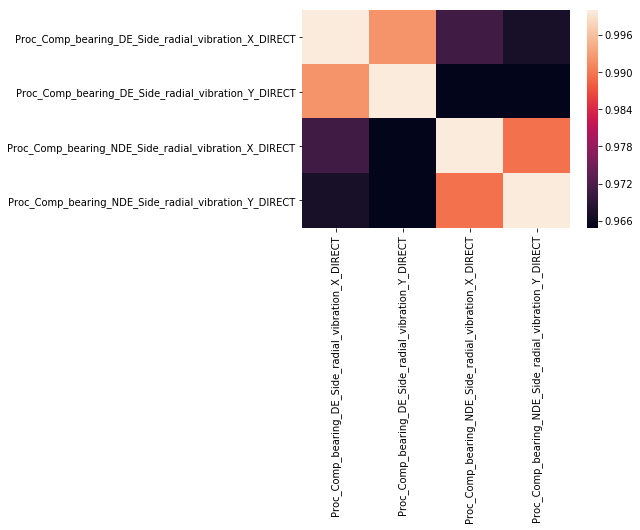

In [58]:
sns.heatmap(corr_df)

# Customize the heatmap Colors 

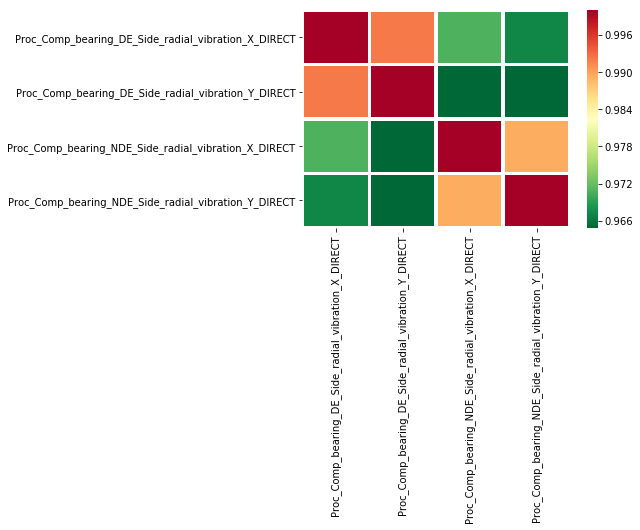

In [59]:
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r',  linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

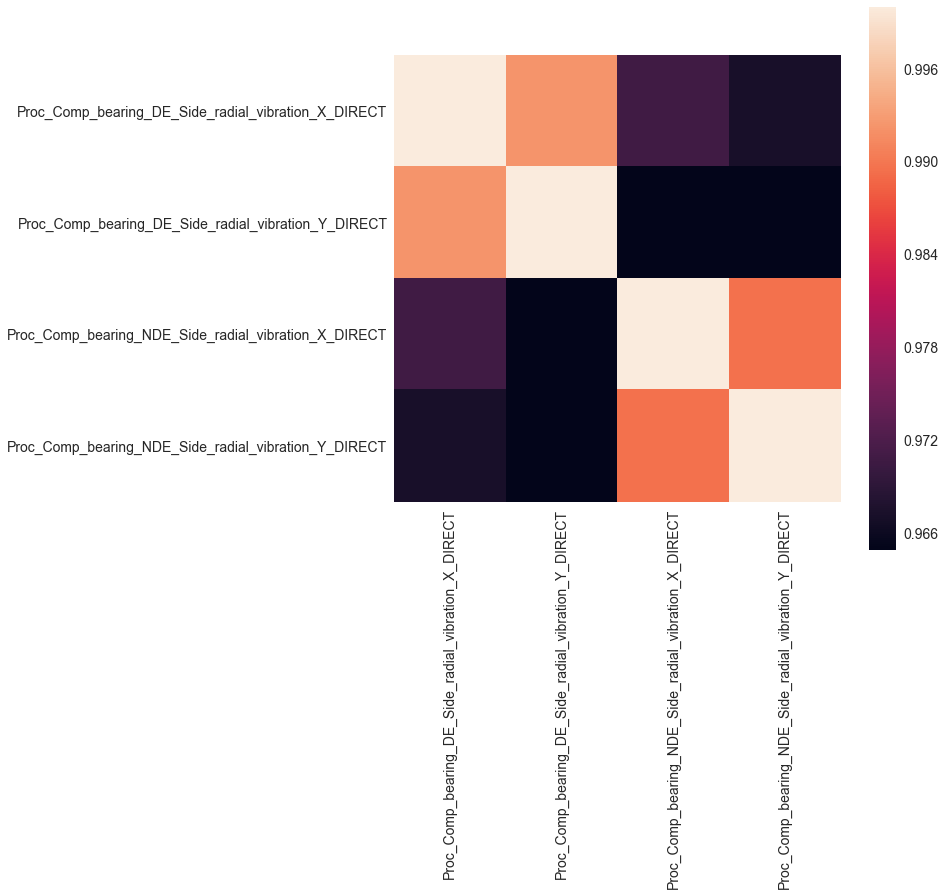

In [62]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_df)
ax.set_aspect("equal")
plt.show()


In [ ]:
# If you want to add a prefix to all the column names...
['a_'+ colname for colname in df.columns] # for every colname, add something to the beginning

In [30]:
cc2.iloc[0]

Antisurge_Valve_Opening_feedback_(%_closed)                0.0733
Proc_Comp_bearing_DE_Side_radial_vibration_X_DIRECT        8.1989
Proc_Comp_bearing_DE_Side_radial_vibration_Y_DIRECT         7.849
Proc_Comp_bearing_NDE_Side_radial_vibration_X_DIRECT       5.4503
Proc_Comp_bearing_NDE_Side_radial_vibration_Y_DIRECT       5.5932
Proc_comp_1st_STG_jornal_bearing_1_temperature_senA            62
Proc_comp_1st_STG_jornal_bearing_1_temperature_senB            68
Proc_comp_1st_STG_journal_bearing_1_temp_C                     67
Proc_comp_1st_STG_jornal_bearing_2_temperature_senA            67
Proc_comp_1st_STG_jornal_bearing_2_temperature_senB            64
Proc_comp_1st_STG_journal_bearing_2_temp_C                     69
Proc_Comp_axial_displacement_A                             0.1765
Proc_Comp_axial_displacement_B                             0.2065
Bearing_Metal_Temp_Thrust_Active_TC_#1                         60
Bearing_Metal_Temp_Thrust_Active_TC_#2                         59
Bearing_Me